In [276]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../../sfmbv')


import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy

import qtree_methods as qtm

from sklearn.cluster import KMeans

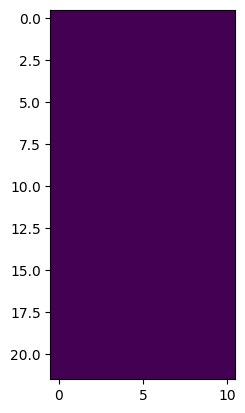

In [277]:
N=11
img_array = np.zeros((2*N,N))
img_array[:(N-3),:] = 0


plt.imshow(img_array)

In [278]:
wf = methods.WeightKernel(
    dist_sig = 1,
    intensity_sig = 0.5
)

# problem with mask?
G = methods.ImageGraph(
    img_array, 
    mask_array=None, 
    wf=wf, 
    neighbour_depth = 1, 
    cmap='viridis'
    )


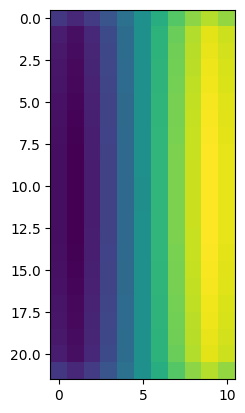

In [295]:
# what it should be
P = nx.normalized_laplacian_matrix(G)
vals, vecs = scipy.sparse.linalg.eigs(P, which='SR')

v = np.real(vecs[:,3])
v_img = methods.node_vec_to_img_array(G, v)
plt.imshow(v_img)

## Now we partition and construct a coarse graph...

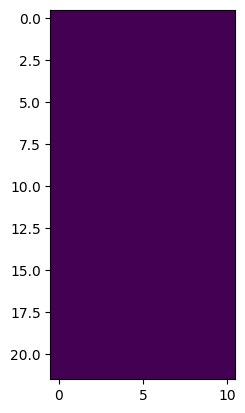

In [280]:
qtree = qtm.QTree2(img_array, min_depth = 4, max_depth = 4, std_delta=0.05)
plt.imshow(qtree.cimg_array)

In [281]:
# define partition
nodes_list = list((G.nodes))
partition_list = []
for i in range(len(nodes_list)):
    curr_coords = G.v_coords[nodes_list[i]]
    partition_list.append(qtree.leaf_inc[*curr_coords])

In [282]:
CG = methods.CoarseGraph(G, nodes_list, partition_list)

0.0
0.005681818181818182
0.011363636363636364
0.017045454545454544
0.022727272727272728
0.028409090909090908
0.03409090909090909
0.03977272727272727
0.045454545454545456
0.05113636363636364
0.056818181818181816
0.0625
0.06818181818181818
0.07386363636363637
0.07954545454545454
0.08522727272727272
0.09090909090909091
0.09659090909090909
0.10227272727272728
0.10795454545454546
0.11363636363636363
0.11931818181818182
0.125
0.13068181818181818
0.13636363636363635
0.14204545454545456
0.14772727272727273
0.1534090909090909
0.1590909090909091
0.16477272727272727
0.17045454545454544
0.17613636363636365
0.18181818181818182
0.1875
0.19318181818181818
0.19886363636363635
0.20454545454545456
0.21022727272727273
0.2159090909090909
0.2215909090909091
0.22727272727272727
0.23295454545454544
0.23863636363636365
0.24431818181818182
0.25
0.2556818181818182
0.26136363636363635
0.26704545454545453
0.2727272727272727
0.2784090909090909
0.2840909090909091
0.2897727272727273
0.29545454545454547
0.30113636363

In [283]:
CG._set_node_colour(qtree)

In [284]:
P = nx.normalized_laplacian_matrix(CG)
vals, vecs = scipy.sparse.linalg.eigs(P, which='SR')

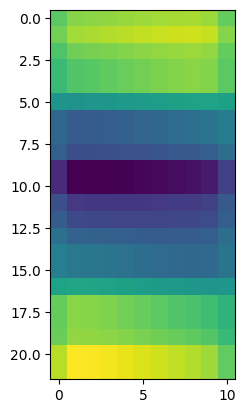

In [285]:
v = np.real(vecs[:,3])
v_img = qtm.leaf_vec_to_img(qtree, v)
plt.imshow(v_img)

### Maximal Q-Tree

In [286]:
qtree = qtm.QTree2(img_array, min_depth = 10, max_depth = 10, std_delta=0.05)
# plt.imshow(qtree.cimg_array)

# define partition
nodes_list = list((G.nodes))
partition_list = []
for i in range(len(nodes_list)):
    curr_coords = G.v_coords[nodes_list[i]]
    partition_list.append(qtree.leaf_inc[*curr_coords])

CG = methods.CoarseGraph(G, nodes_list, partition_list)

CG._set_node_colour(qtree)

P = nx.normalized_laplacian_matrix(CG)
vals, vecs = scipy.sparse.linalg.eigs(P, which='SR')

0.0
0.004132231404958678
0.008264462809917356
0.012396694214876033
0.01652892561983471
0.02066115702479339
0.024793388429752067
0.028925619834710745
0.03305785123966942
0.0371900826446281
0.04132231404958678
0.045454545454545456
0.049586776859504134
0.05371900826446281
0.05785123966942149
0.06198347107438017
0.06611570247933884
0.07024793388429752
0.0743801652892562
0.07851239669421488
0.08264462809917356
0.08677685950413223
0.09090909090909091
0.09504132231404959
0.09917355371900827
0.10330578512396695
0.10743801652892562
0.1115702479338843
0.11570247933884298
0.11983471074380166
0.12396694214876033
0.128099173553719
0.1322314049586777
0.13636363636363635
0.14049586776859505
0.1446280991735537
0.1487603305785124
0.15289256198347106
0.15702479338842976
0.16115702479338842
0.1652892561983471
0.16942148760330578
0.17355371900826447
0.17768595041322313
0.18181818181818182
0.1859504132231405
0.19008264462809918
0.19421487603305784
0.19834710743801653
0.2024793388429752
0.2066115702479339
0

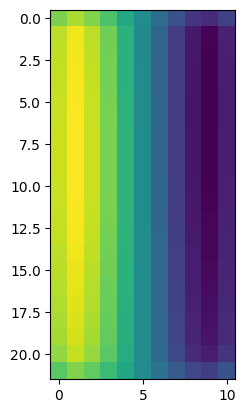

In [287]:
v = np.real(vecs[:,3])
v_img = qtm.leaf_vec_to_img(qtree, v)
plt.imshow(v_img)

In [288]:
# maximal partition (nothing happens)
nodes_list = list((G.nodes))
partition_list = []
for i in range(len(nodes_list)):
    # curr_coords = G.v_coords[nodes_list[i]]
    partition_list.append(nodes_list[i])

print(partition_list)
print(nodes_list)

[0, 1, 11, 2, 12, 3, 13, 4, 14, 15, 23, 22, 26, 25, 24, 45, 44, 34, 33, 46, 35, 36, 47, 37, 48, 5, 16, 27, 38, 49, 7, 18, 6, 17, 29, 28, 39, 40, 50, 51, 8, 19, 30, 41, 52, 9, 10, 21, 20, 31, 32, 43, 42, 53, 54, 56, 55, 57, 59, 58, 60, 62, 61, 63, 64, 65, 66, 77, 78, 67, 79, 68, 69, 80, 70, 81, 88, 89, 90, 92, 91, 110, 99, 111, 100, 112, 101, 102, 113, 114, 103, 71, 82, 104, 115, 93, 83, 72, 84, 73, 85, 74, 75, 76, 87, 86, 95, 94, 98, 96, 97, 116, 106, 105, 117, 118, 107, 108, 109, 119, 120, 121, 122, 123, 124, 125, 126, 128, 127, 129, 130, 131, 132, 133, 134, 135, 136, 144, 143, 147, 146, 145, 166, 165, 155, 154, 167, 156, 157, 168, 158, 169, 137, 148, 159, 170, 139, 138, 150, 149, 160, 161, 171, 172, 140, 151, 162, 173, 142, 141, 152, 153, 164, 163, 174, 175, 177, 176, 178, 180, 179, 181, 183, 182, 184, 185, 186, 187, 198, 199, 188, 200, 189, 190, 201, 191, 202, 209, 210, 211, 213, 212, 231, 220, 232, 221, 233, 222, 223, 234, 235, 224, 192, 203, 225, 236, 214, 204, 193, 205, 194, 206,

In [289]:
CG = methods.CoarseGraph(G, nodes_list, partition_list)

0.0
0.004132231404958678
0.008264462809917356
0.012396694214876033
0.01652892561983471
0.02066115702479339
0.024793388429752067
0.028925619834710745
0.03305785123966942
0.0371900826446281
0.04132231404958678
0.045454545454545456
0.049586776859504134
0.05371900826446281
0.05785123966942149
0.06198347107438017
0.06611570247933884
0.07024793388429752
0.0743801652892562
0.07851239669421488
0.08264462809917356
0.08677685950413223
0.09090909090909091
0.09504132231404959
0.09917355371900827
0.10330578512396695
0.10743801652892562
0.1115702479338843
0.11570247933884298
0.11983471074380166
0.12396694214876033
0.128099173553719
0.1322314049586777
0.13636363636363635
0.14049586776859505
0.1446280991735537
0.1487603305785124
0.15289256198347106
0.15702479338842976
0.16115702479338842
0.1652892561983471
0.16942148760330578
0.17355371900826447
0.17768595041322313
0.18181818181818182
0.1859504132231405
0.19008264462809918
0.19421487603305784
0.19834710743801653
0.2024793388429752
0.2066115702479339
0

In [290]:
# CG._set_node_colour(qtree)
P = nx.normalized_laplacian_matrix(CG)
vals, vecs = scipy.sparse.linalg.eigs(P, which='SR')

In [291]:
v = np.real(vecs[:,1])
v_img = methods.nodes
plt.imshow(v_img)

AttributeError: module 'methods' has no attribute 'nodes'